In [702]:
# importaremos las bibliotecas utilizadas para el aprendizaje automático
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # Se usa para trazar el grafico 
import seaborn as sns # utilizado para trazar gráfico interactivo
%matplotlib inline
from sklearn.linear_model import LogisticRegression # para usar el modelo de regresión
from sklearn.model_selection import train_test_split # para dividir los datos en entrenamieto y pruebas
from sklearn.model_selection import GridSearchCV# parametro de ajuste
from sklearn.ensemble import RandomForestClassifier # para genrear modelo de clasificación
from sklearn.naive_bayes import GaussianNB # para genrear modelo de GaussianNB
from sklearn.neighbors import KNeighborsClassifier # para genrear modelo de KNN
from sklearn.tree import DecisionTreeClassifier # para genrear modelo de decisión
from sklearn import svm # vectores de soporte
from sklearn import metrics # comprobar el error y precision del modelo
from sklearn.preprocessing import StandardScaler #estándariza los datos
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix#mattriz de confusión
from sklearn.svm import SVC # vectores de soporte
from sklearn.decomposition import PCA
from dtreeviz.trees import dtreeviz # visualizar arbolde nos ayuda a la grafica
from xgboost import XGBClassifier # para genrear modelo XGBClassifier
from sklearn.metrics import classification_report

In [703]:
with open('C:/Users/davalos/Dropbox/Davalos/Documents/Danny Documentos/UIDE/Materias/Modelos y Aprendizajes/Examen Final/wdbc.data') as file:
  
    org_df = pd.read_csv(file,header = None)
    headers=['id',	'diagnosis',	'radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean',	'symmetry_mean',	'fractal_dimension_mean',	'radius_se',	'texture_se',	'perimeter_se',	'area_se',	'smoothness_se',	'compactness_se',	'concavity_se',	'concave points_se',	'symmetry_se',	'fractal_dimension_se',	'radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst',	'symmetry_worst',	'fractal_dimension_worst']
    org_df.columns=headers
    

In [704]:
org_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [705]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [706]:
org_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [707]:
print(org_df.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890

In [708]:
org_df.duplicated().sum()

0

In [709]:
org_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [710]:
org_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [711]:
org_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [712]:
org_df['diagnosis'] = org_df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [713]:
org_df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [714]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [715]:
org_df.drop("id",axis=1,inplace=True)

In [716]:
org_df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [717]:
features_mean= list(org_df.columns[1:11])
features_se= list(org_df.columns[11:20])
features_worst=list(org_df.columns[21:31])
print("------------MEAN-------------------")
print(features_mean)
print("-------------SE--------------------")
print(features_se)
print("------------WORST------------------")
print(features_worst)

------------MEAN-------------------
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-------------SE--------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
------------WORST------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<AxesSubplot:>

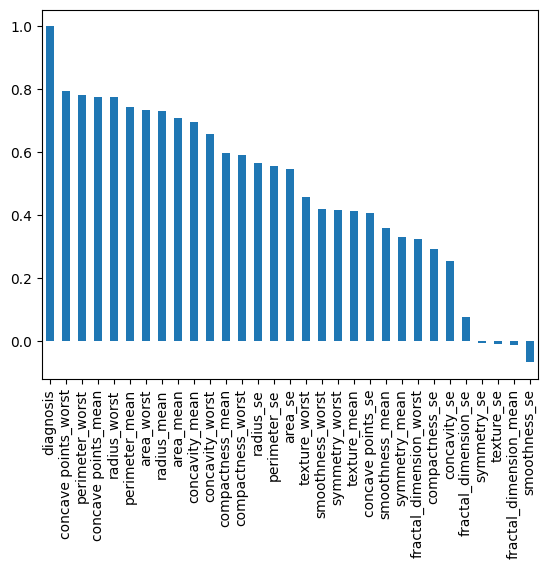

In [718]:
corr = org_df.corr()['diagnosis'].sort_values(ascending=False)
corr.plot(kind='bar')

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


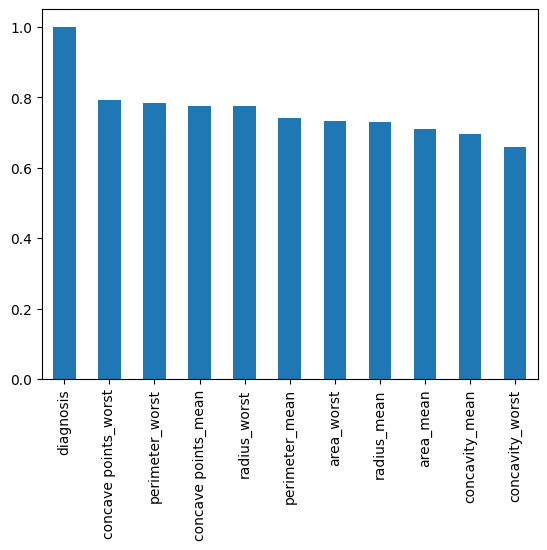

In [719]:
corr[corr >= 0.6].plot(kind='bar')
print(corr[corr >= 0.6])

<AxesSubplot:>

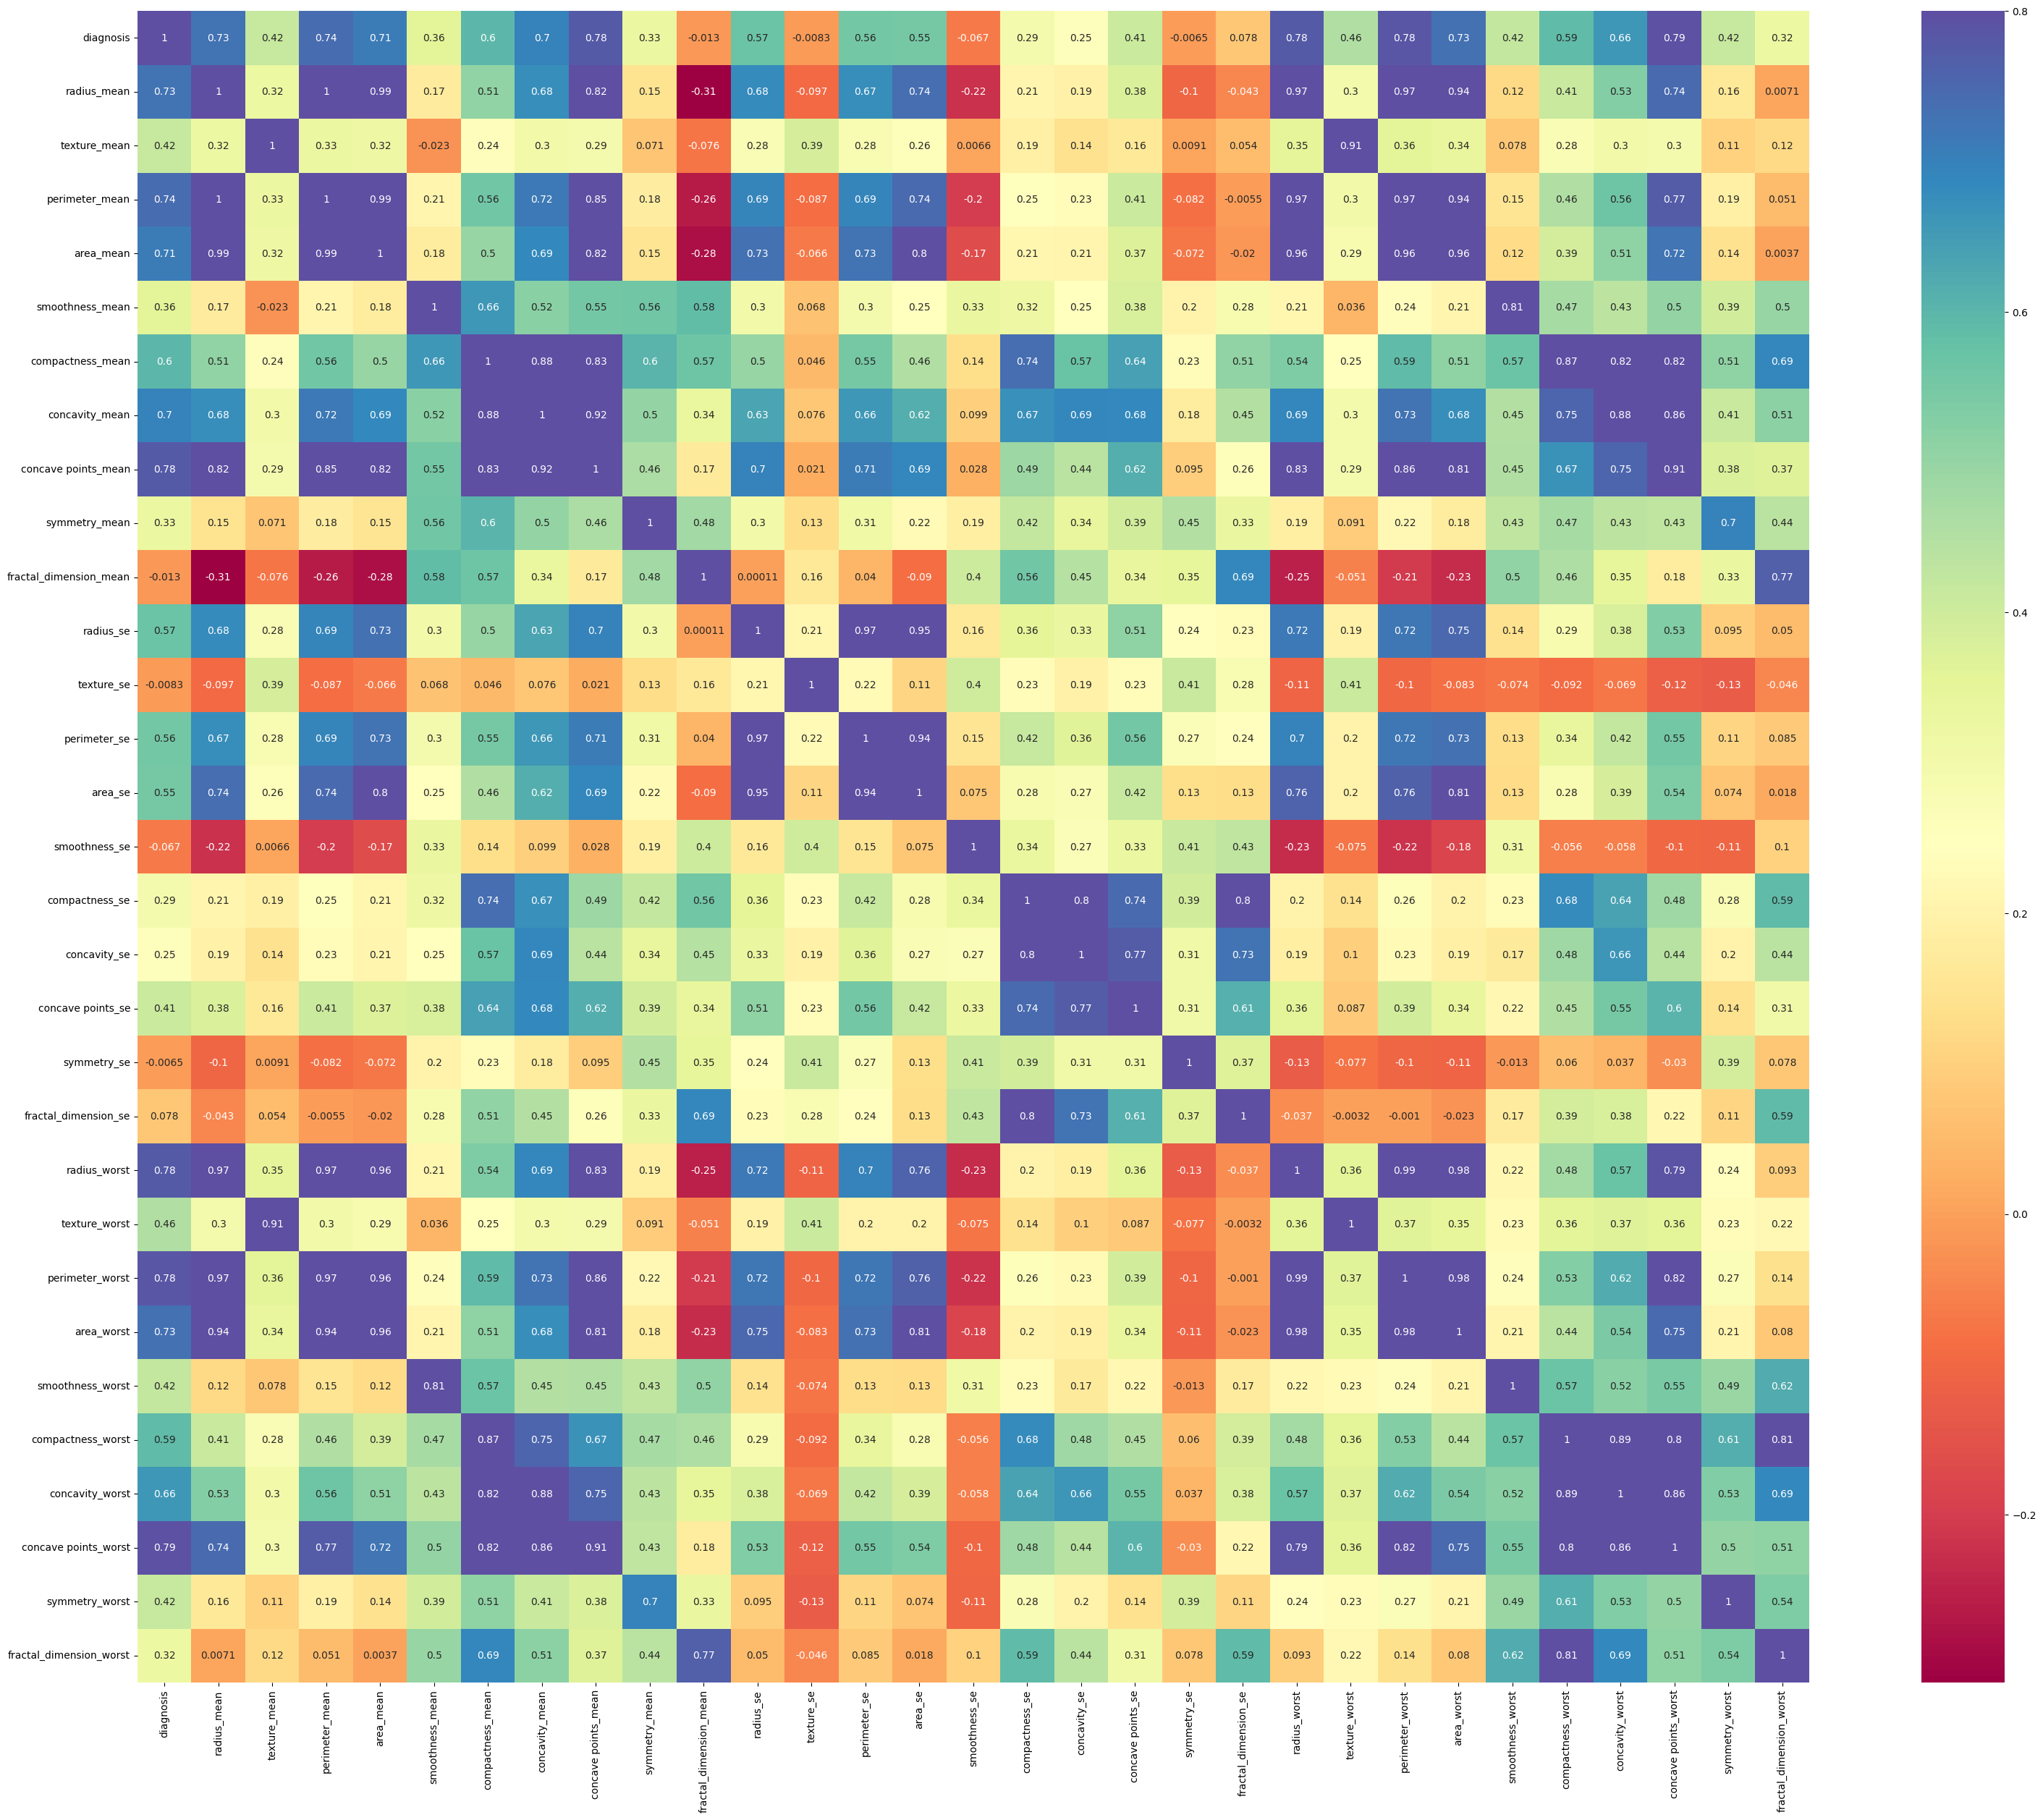

In [720]:
corrmat = org_df.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(corrmat, vmax=.8, square=True, annot = True, cmap = 'Spectral')

In [721]:
data=org_df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','symmetry_mean','concavity_mean', 'concave points_mean', 'fractal_dimension_mean']]

In [722]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  symmetry_mean  concavity_mean  \
0          0.11840           0.27760         0.2419          0.3001   
1          0.08474           0.07864         0.1812          0.0869   
2          0.10960           0.15990         0.2069          0.1974   
3          0.14250           0.28390         0.2597          0.2414   
4          0.10030           0.13280         0.1809          0.1980   

   concave points_mean  fractal_dimension_mean  
0              0.14710                 0.07871  
1              0.07017                 0.05667  
2              0.12790                 0.05999  
3              0.10520                 0.09744  
4              0.10430                 0.05883

In [723]:
data.shape

(569, 11)

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

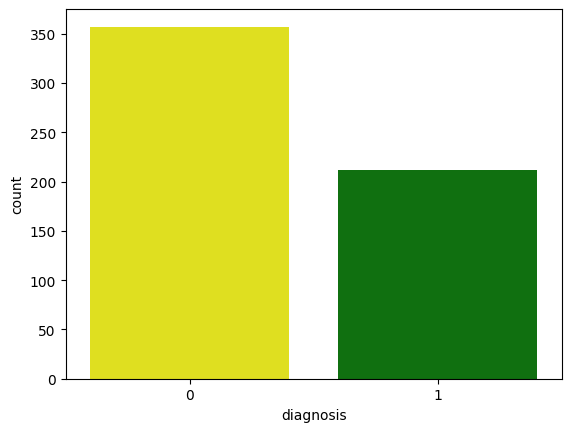

In [724]:
sns.countplot(x="diagnosis",data=data,label="count",palette={"yellow","green"})

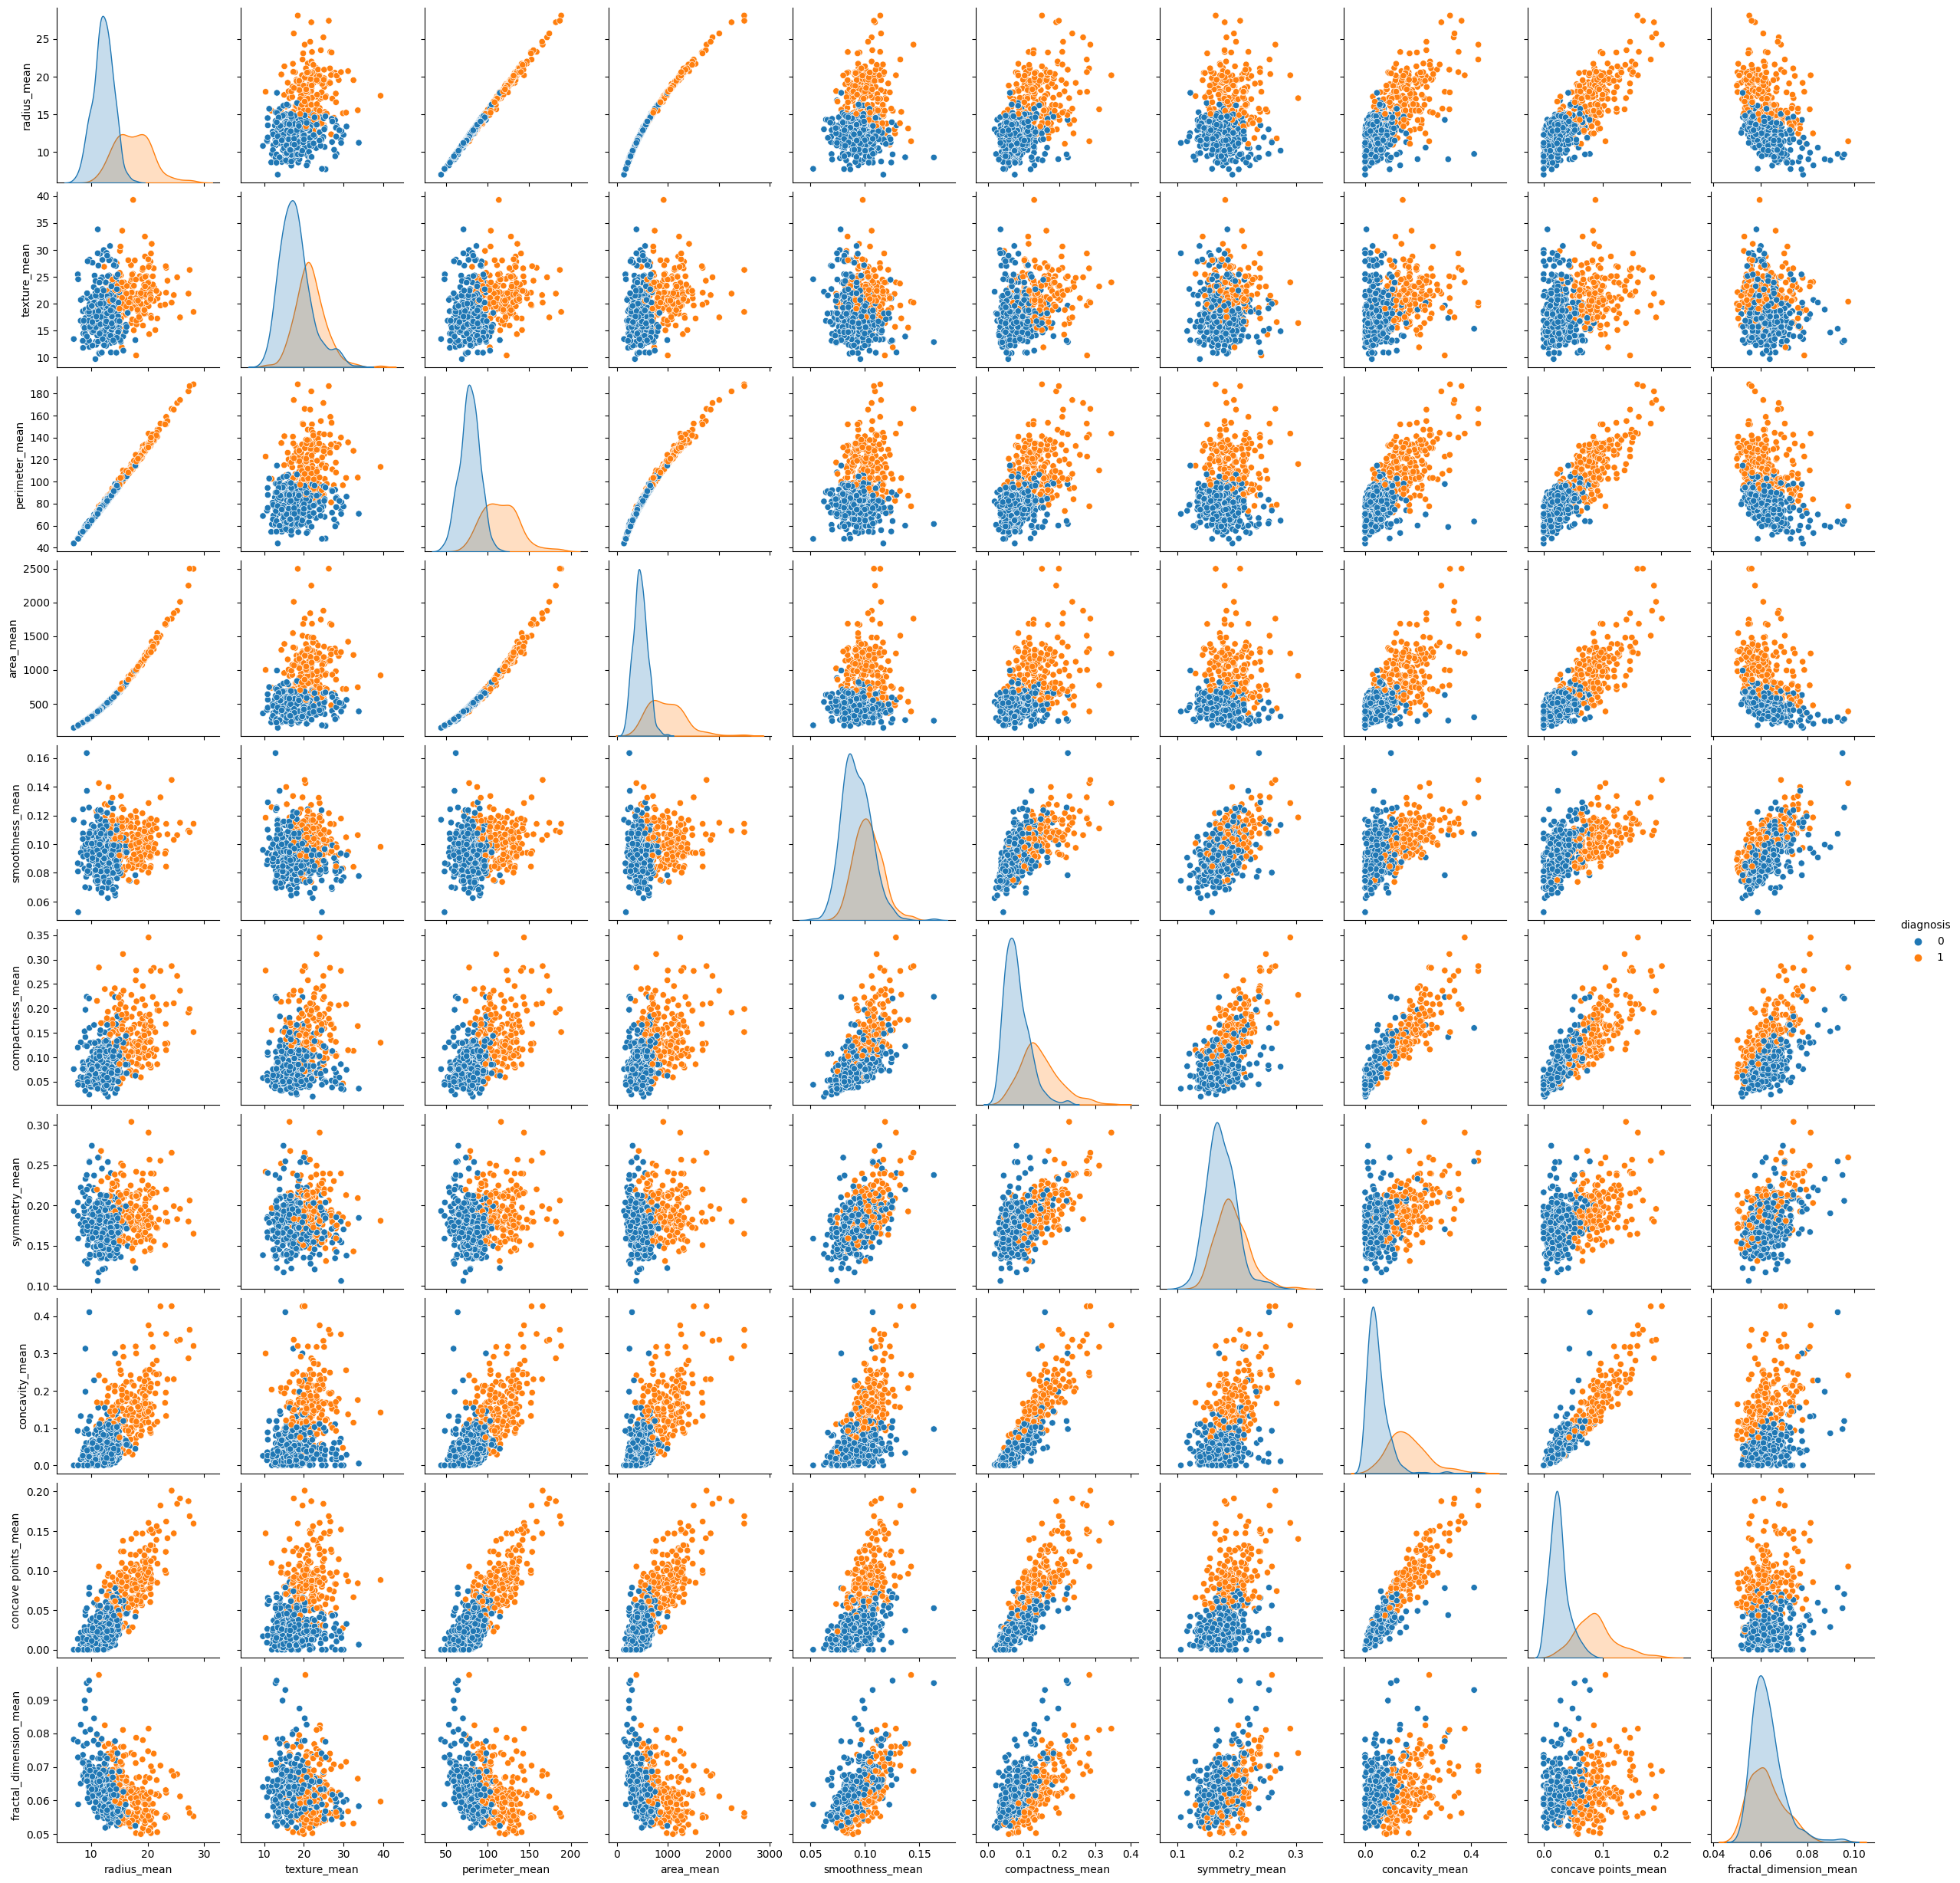

In [725]:
sns.pairplot(data=data,hue="diagnosis")

<AxesSubplot:>

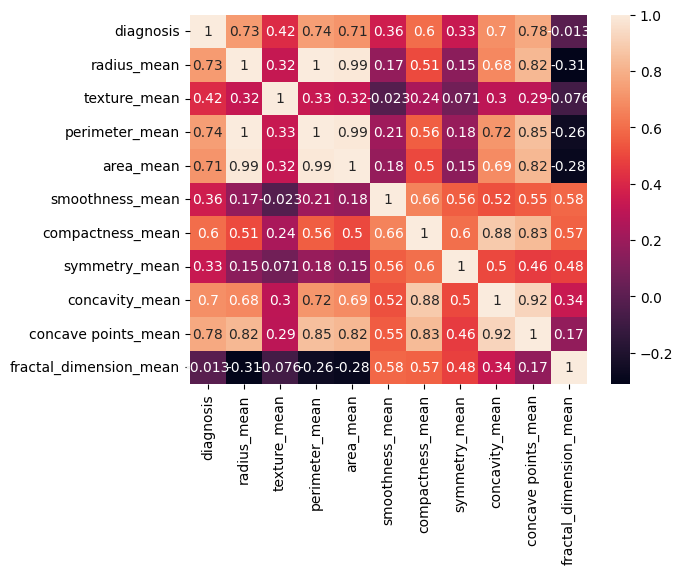

In [726]:
corr = data.corr()
sns.heatmap(corr,annot = True)


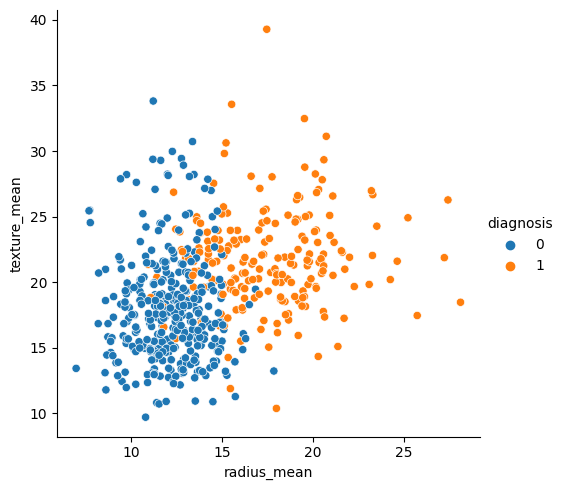

In [727]:
sns.relplot(x="radius_mean",y="texture_mean",data=data,hue="diagnosis")

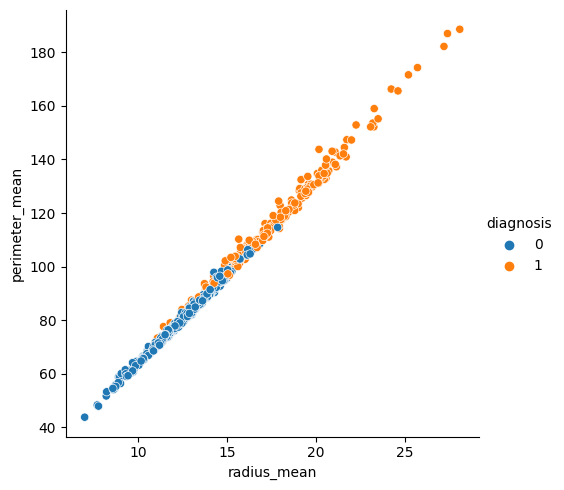

In [728]:
sns.relplot(x="radius_mean",y="perimeter_mean",data=data,hue="diagnosis")

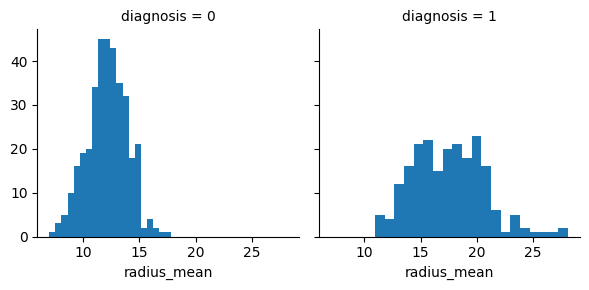

In [729]:
# Histograma entre radius_mean y diagnosis
g=sns.FacetGrid(data, col = 'diagnosis')
g.map(plt.hist,'radius_mean', bins = 20)

In [730]:
y = data['diagnosis'] #Variable objetivo 
X = data.drop(['diagnosis'], axis = 1) ### caracteristicas de entrada
y.head(3)

0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [731]:
X

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  symmetry_mean  concavity_mean  concave points_mean  \
0             0.27760         0.2419         0.30010              0.14710   
1             0.07864         0.1812         0.08690              0.07017   
2             0.15990         0.2069         0.19740              0.12790   
3             0.28390         0.2597         0.24140              0.10520   
4             0.13280         0.1809         0.19800              0.10430   
..                ...            ...             ...                  ...   
564           0.11590         0.1726         0.24390              0.13890   
565           0.10340         0.1752         0.14400              0.09791   
566           0.10230         0.1590         0.09251              0.05302   
567           0.27700         0.2397         0.35140              0.15200   
568           0.04362         0.1587         0.00000              0.00000   

     fractal_dimension_mean  
0                   0.07871  
1                   0.05667  
2                   0.05999  
3                   0.09744  
4                   0.05883  
..                      ...  
564                 0.05623  
565                 0.05533  
566                 0.05648  
567                 0.07016  
568                 0.05884  

[569 rows x 10 columns]

In [732]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[0.13032676 0.06567615 0.15822488 0.12854505 0.03605289 0.07214989
 0.02803538 0.18797226 0.17160374 0.02141299]


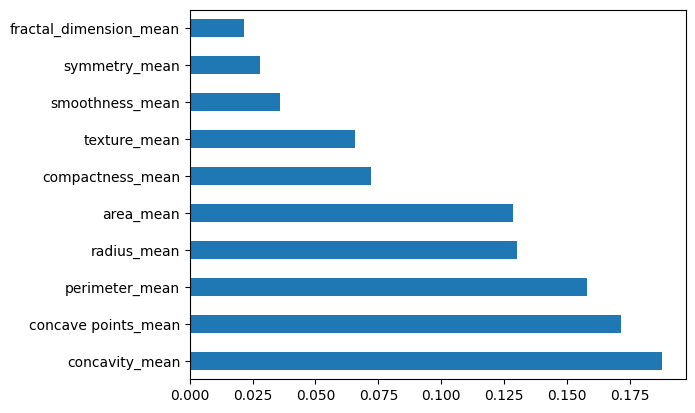

In [733]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_, index = X.columns)
feat_imp.nlargest(25).plot(kind = 'barh')
plt.show()

In [734]:
#Modelo de Regresión
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)
accu_reg = accuracy_score(y_test, Y_pred_log)
print("Exactitud de modelo de Regression:", accu_reg*100)

Exactitud de modelo de Regression: 92.98245614035088


C:\Users\davalos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


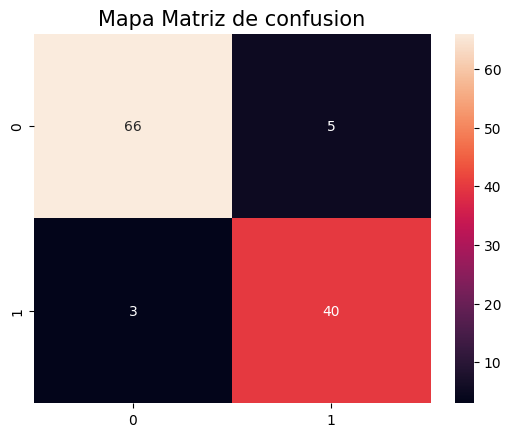

In [735]:
cm = confusion_matrix(y_test, Y_pred_log)
plt.title('Mapa Matriz de confusion', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [736]:
#Vestores de soporte
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_svm = svc.predict(X_test)
accu_svc = accuracy_score(y_test, Y_pred_svm)
print("Precisión utilizando la máquina de vectores de soporte:", accu_svc*100)

Precisión utilizando la máquina de vectores de soporte: 92.10526315789474


In [737]:
#Modelo de knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = svc.predict(X_test)
accu_knn = accuracy_score(y_test, Y_pred_knn)
print("Precisión utilizando modelo KNN:", accu_knn*100)

Precisión utilizando modelo KNN: 92.10526315789474


In [738]:
#Modelo de random_forest
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_dt = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, Y_pred_dt)
print("Precisión utilizando modelo Decision Tree:", acc_decision_tree*100)

Precisión utilizando modelo Decision Tree: 92.98245614035088


In [739]:
pca = PCA(n_components=3)

In [740]:
pca.fit(X_train)

PCA(n_components=3)

In [741]:
def draw_tree(X, y, tree: DecisionTreeClassifier):
    viz = dtreeviz(tree, X, y,
                   target_name="diagnosis",
                   feature_names=[str(x) for x in range(X.shape[1])],
                   class_names=list(map(str, list(set(y)))))
    return viz

3


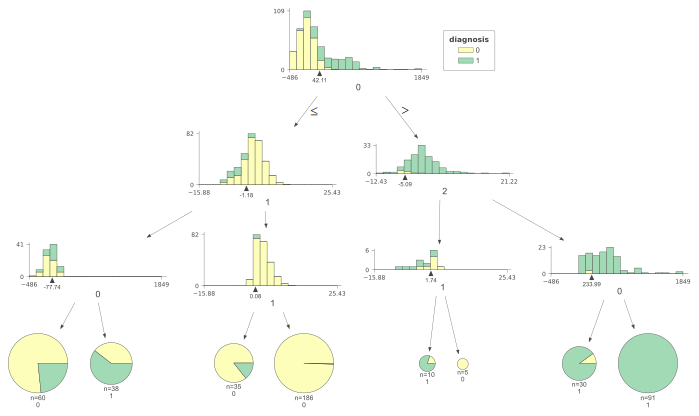

In [742]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(pca.transform(X_train), y_train)
print(decision_tree.get_depth())
viz = draw_tree(pca.transform(X_train), y_train, decision_tree)
viz

In [743]:
# Modelo de random_forest 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = accuracy_score(y_test, Y_pred_rf)
print("Precisión de modelo Random Forest:", acc_random_forest*100)

Precisión de modelo Random Forest: 94.73684210526315


In [744]:
# Modelo de XGBoost 
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("Precisión de modelo XGBoost Classifier:", acc_xgb*100)

Precisión de modelo XGBoost Classifier: 97.36842105263158


In [745]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Decision Tree',
              'Random Forest', 'XG Boost'],
    'Score': [accu_svc, accu_knn, accu_reg, acc_decision_tree,
              acc_random_forest, acc_xgb]})
models.sort_values(by='Score', ascending=False)

Model     Score
5                 XG Boost  0.973684
4            Random Forest  0.947368
2      Logistic Regression  0.929825
3            Decision Tree  0.929825
0  Support Vector Machines  0.921053
1                      KNN  0.921053

In [746]:
print(classification_report(y_test, Y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

